# Trabajo Practico Final

## Alumnos

|Apellido | Nombres  |  Padron |
|:-------:|:--------:|:-------:|
|  Blanco |  Sebastian Ezequiel | 98539  |
|  Llauro | Manuel Luis  |  95736 |
|  Rial | Sebastian Andres  | 90309  |

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comprensión de los datos

In [19]:
#----------------------------------------------------------------
# GET DATA FRAME
#----------------------------------------------------------------
def get_data_frame(path, a_sep):
    return pd.read_csv(path, low_memory=False, sep=a_sep)
#----------------------------------------------------------------
# GET JSON
#----------------------------------------------------------------
def get_json(path):
    return pd.read_json(path)
#----------------------------------------------------------------
# GET CATEGORIES CONVERTION
#----------------------------------------------------------------
def get_categories_convertion(json):
    size = len(json)
    categories = {}
    for i in range(0, size):
        _id = int(json['items'][i]['id'])
        value = str(json['items'][i]['snippet']['title'])
        categories[_id] = value
    return categories
#----------------------------------------------------------------
# ADD CATEGORIES
#----------------------------------------------------------------
def add_categories(videos, categories_dict):
    categories = []
    size = len(videos)
    for i in range(0, size):
        categories.append(categories_dict[videos['category_id'][i]])
    videos['categories'] = categories
    return videos
#----------------------------------------------------------------
# PARSE PUBLISH TIME
#----------------------------------------------------------------
def parse_publish_time(time):
    # format recieved: 2017-11-13T17:13:01.000Z
    # format returned: '2017-11-13 13:01:000'
    splited = time.split('T')
    timestamp = splited[0] + " " + splited[1].split('Z')[0]
    return timestamp
#----------------------------------------------------------------
# PUBLISH TIME TO TIMESTAMP
#----------------------------------------------------------------
def publish_time_to_date(time):
    # format recieved: '2017-11-13 13:01:000'
    # format returned: object: '2017-11-13 13:01:000'
    return pd.Timestamp.date(pd.Timestamp(time))
#----------------------------------------------------------------
# PARSE TRENDING DATE
#----------------------------------------------------------------
def parse_trending_date(date):
    # format recieved: 17.14.11
    # format returned: 2017-11-14
    splited = date.split('.')
    year = "20" + splited[0]
    month = splited[2]
    day = splited[1]
    date_str = year + "-" + month + "-" + day
    return pd.Timestamp.date(pd.Timestamp(date_str))
#----------------------------------------------------------------
# CHANGE DATE FORMATS
#----------------------------------------------------------------
def change_date_formats(videos):
    videos['publish_time'] = videos['publish_time'].apply(lambda x: parse_publish_time(x))
    videos['publish_time'] = videos['publish_time'].apply(lambda x: publish_time_to_date(x))
    videos['trending_date'] = videos['trending_date'].apply(lambda x: parse_trending_date(x))
    return videos

In [20]:
videos = get_data_frame("./data/USvideos.csv", ',')
json = get_json("./data/US_category_id.json")
categories_dict = get_categories_convertion(json)
videos = add_categories(videos, categories_dict)
videos = change_date_formats(videos)

## Recolectar los Datos Iniciales
Los datos utilizados durante el transcurso del proyecto fueron obtenidos gratuitamente
en el sitio de Kaggle y el mismo se encuentra en formato csv.

### Reporte de Descripción de los Datos
* El data set se encuentra en la carpeta ```src/doc/``` del proyecto. 
* se uso pandas como metodo de recoleccion de datos.
* Para poder levantar el set de datos se usa como separado una coma.

In [4]:
videos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,categories
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


## Descubrir datos

### Reporte de descripción de datos

In [5]:
videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
categories                object
dtype: object

## Exploración de los Datos

### Reporte de Exploración de datos

#### Analisis de categorias

Text(0.5,1,u'Genres count')

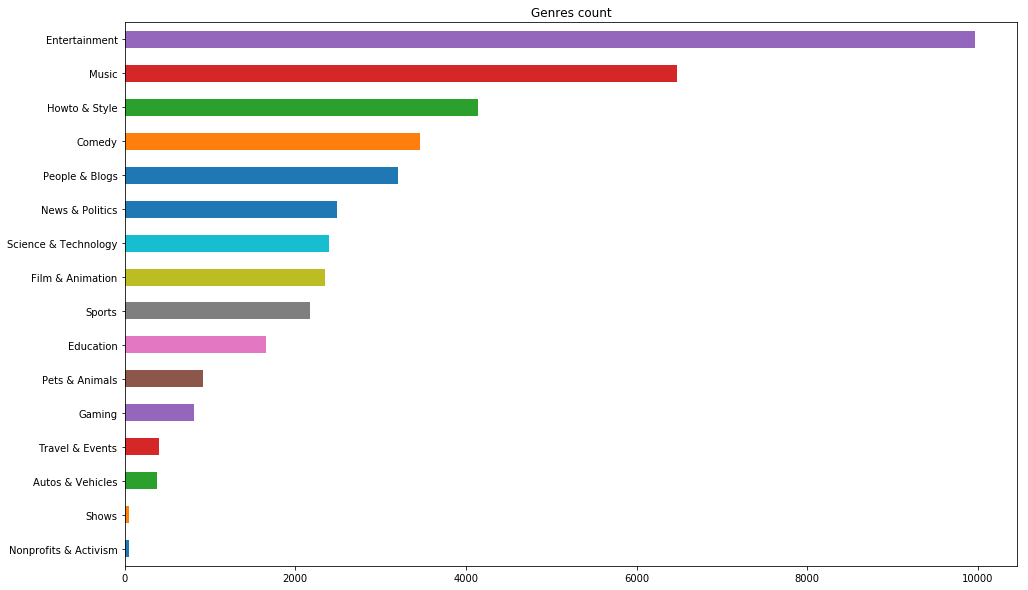

In [6]:
graph = videos.categories.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Genres count')
graph.get_figure().savefig("../doc/report/pics/Analisis-de-categorias.png")
graph

#### Analisis de vistas en funcion de likes

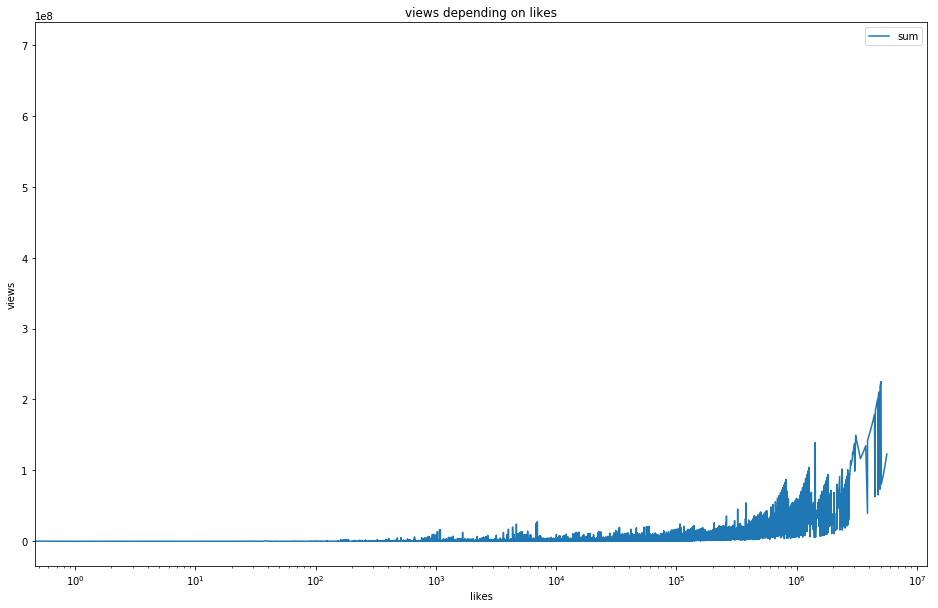

In [7]:
views = videos.loc[:, ['likes', 'views']].groupby('likes').agg({'views': ['sum']}).reset_index()
graph = views.plot(x='likes', y='views', logx=True, kind='line', figsize=(16,10))
graph.set_title('views depending on likes')
graph.set_xlabel("likes")
graph.set_ylabel("views")
graph.get_figure().savefig("../doc/report/pics/Analisis_de_vistas_en_funcion_de_likes.png")
graph

#### Analisis de vistas en funcion de la diferencia de dias entre la fecha de tendencia y la de publicacion 

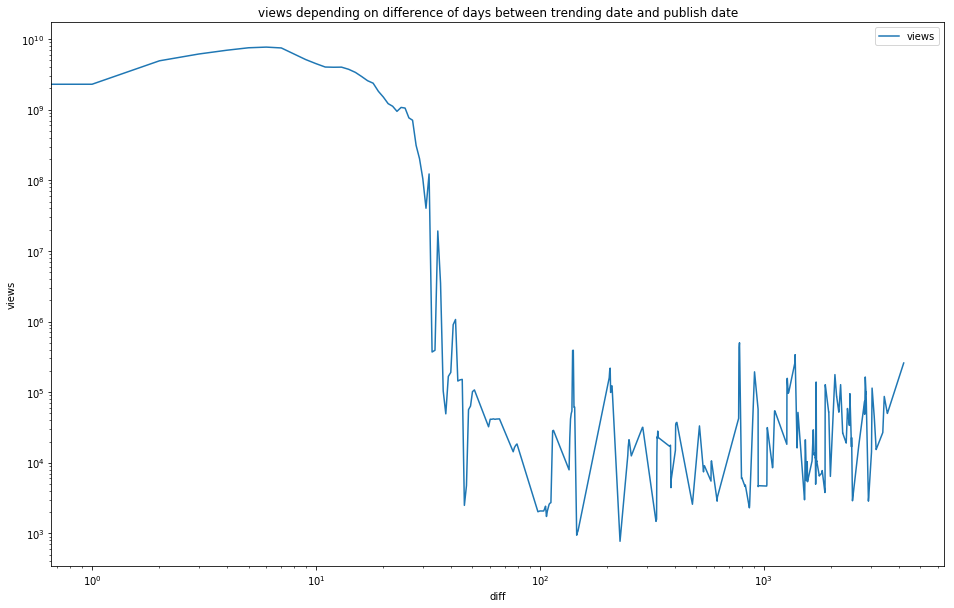

In [8]:
trending = videos.copy(deep=True)
trending['diff'] = trending['trending_date'] - trending['publish_time']
trending['diff'] = trending['diff'].map(lambda x: x.days)
trending = trending.loc[:, ['diff', 'views']].groupby('diff').agg({'views': 'sum'}).reset_index()
graph = trending.plot(x='diff', y='views', loglog=True, kind='line', figsize=(16,10))
graph.set_title('views depending on difference of days between trending date and publish date')
graph.set_xlabel("diff")
graph.set_ylabel("views")
graph.get_figure().savefig("../doc/report/pics/Analisis_de_vistas_en_funcion_de_la_diferencia_de_dias_entre_la_fecha_de_tendencia_y_la_de_publicacion.png")
graph

#### Analisis de vistas en funcion de la diferencia de likes y dislikes

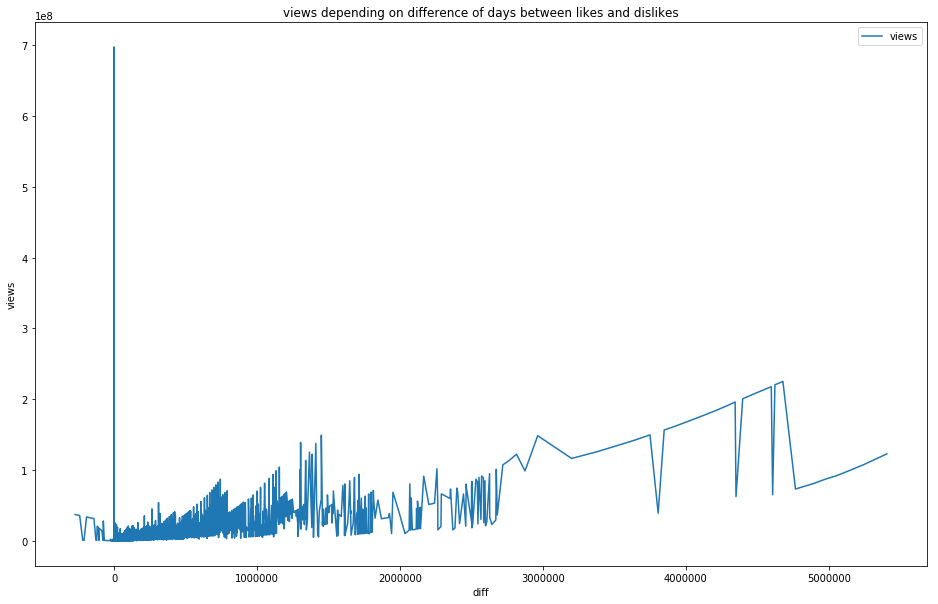

In [22]:
likes_dislikes_diff = videos.copy(deep=True)
likes_dislikes_diff['diff'] = likes_dislikes_diff['likes'] - likes_dislikes_diff['dislikes']
#likes_dislikes_diff['diff'] = likes_dislikes_diff['diff'].map(lambda x: abs(x))
likes_dislikes_diff = likes_dislikes_diff.loc[:, ['diff', 'views']].groupby('diff').agg({'views': 'sum'}).reset_index()
graph = likes_dislikes_diff.plot(x='diff', y='views', kind='line', figsize=(16,10))
graph.set_title('views depending on difference of days between likes and dislikes')
graph.set_xlabel("diff")
graph.set_ylabel("views")
graph.get_figure().savefig("../doc/report/pics/Analisis_de_vistas_en_funcion_de_la_diferencia_de_likes_y_dilikes.png")
graph

#### Analisis del progreso de views del video con mayor views del set de datos.

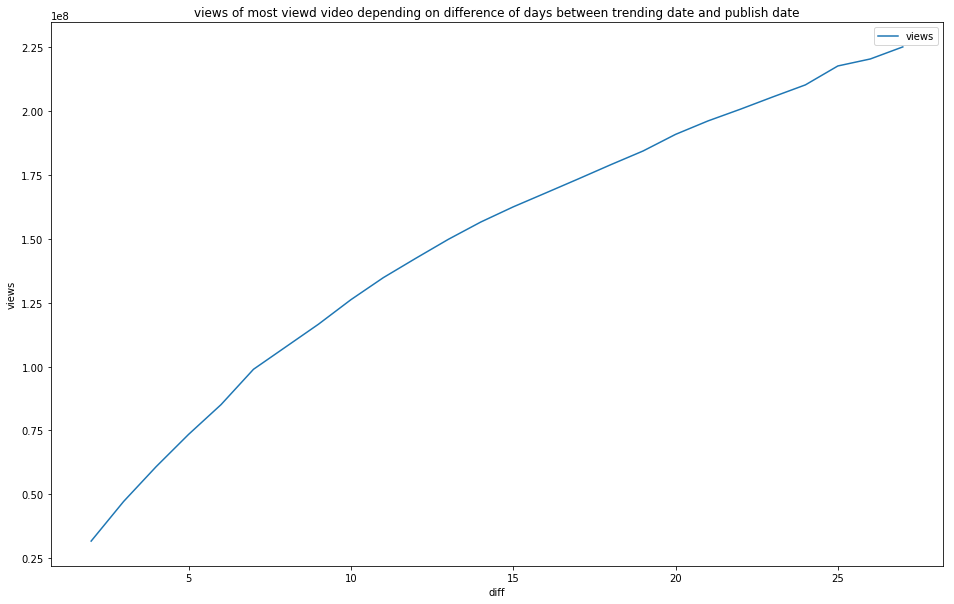

In [10]:
videos_progress = videos.copy(deep=True)
idx = videos_progress['views'].idxmax()
most_viewd_video_id = videos_progress['video_id'][idx]
likes_dislikes_diff = videos.copy(deep=True)
videos_progress = videos_progress.loc[:, ['video_id', 'views', 'trending_date', 'publish_time']]
videos_progress = videos_progress[videos_progress['video_id'] == most_viewd_video_id]
videos_progress['diff'] = videos_progress['trending_date'] - videos_progress['publish_time']
videos_progress['diff'] = videos_progress['diff'].map(lambda x: x.days)
videos_progress = videos_progress.loc[:, ['views', 'diff']]
graph = videos_progress.plot(x='diff', y='views', kind='line', figsize=(16,10))
graph.set_title('views of most viewd video depending on difference of days between trending date and publish date')
graph.set_xlabel("diff")
graph.set_ylabel("views")
graph.get_figure().savefig("../doc/report/pics/Analisis_del_progreso_de_views_del_video_con_mayor_views_del_set_de_datos.png")
graph

#### Analisis del progreso de views de los videos con mayor, mediano y menor vistas del set de datos.

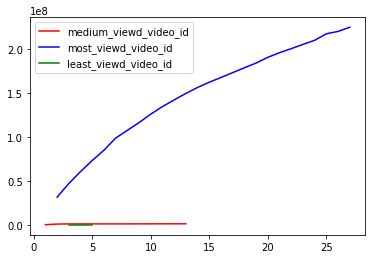

In [11]:
videos_progress = videos.copy(deep=True)

idx = videos_progress['views'].idxmax()
most_viewd_video_id = videos_progress['video_id'][idx]

idx = videos_progress['views'].idxmin()
least_viewd_video_id = videos_progress['video_id'][idx]

size = len(videos_progress)
videos_progress.sort_values(by='views', inplace=True)
medium_viewd_video_id = videos_progress['video_id'][size/2]

videos_progress = videos_progress[(videos_progress['video_id'] == most_viewd_video_id) | (videos_progress['video_id'] == medium_viewd_video_id) | (videos_progress['video_id'] == least_viewd_video_id)]

videos_progress['diff'] = videos_progress['trending_date'] - videos_progress['publish_time']
videos_progress['diff'] = videos_progress['diff'].map(lambda x: x.days)
videos_progress = videos_progress.loc[:, ['video_id', 'views', 'diff']]
colors = {
    most_viewd_video_id: 'b-', 
    medium_viewd_video_id: 'r-',
    least_viewd_video_id: 'g-'
}
labels = {
    most_viewd_video_id: 'most_viewd_video_id', 
    medium_viewd_video_id: 'medium_viewd_video_id',
    least_viewd_video_id: 'least_viewd_video_id'
}
for key, grp in videos_progress.groupby(['video_id']):
    plt.plot(grp['diff'], grp['views'], colors[key], label=labels[key])
plt.legend(loc='best')
plt.savefig("../doc/report/pics/Analisis_del_progreso_de_views_de_los_videos_con_mayor_mediano_y_menor_vistas_del_set_de_datos.png")
plt.show()

#### Analisis de la cantidad de views segun el largo del titulo del video

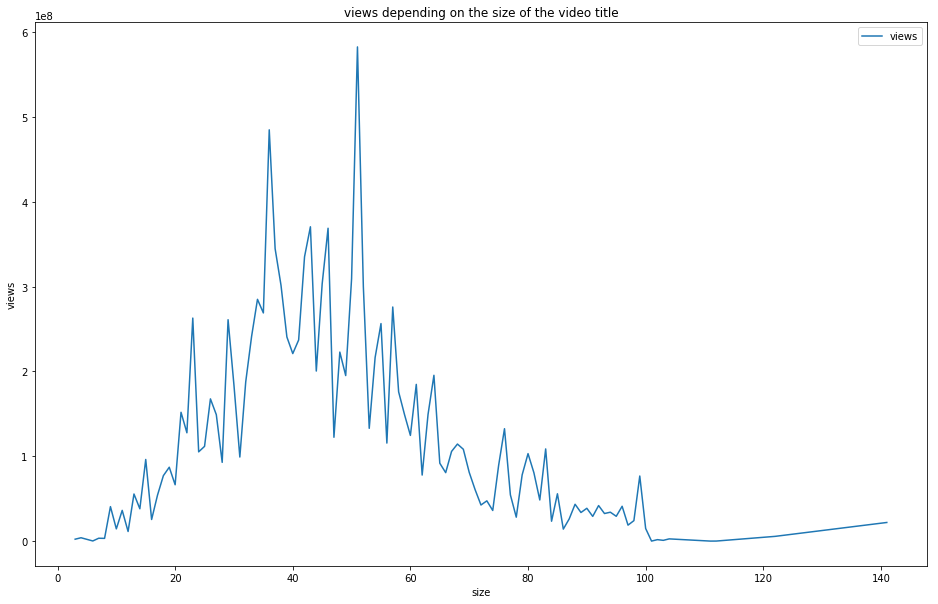

In [12]:
title_size = videos.copy(deep=True)
title_size['size'] = title_size['title'].map(lambda x: len(x))
title_size = title_size.loc[:, ['video_id', 'size', 'views']]
title_size = title_size.groupby(['video_id', 'size']).agg({'views': 'max'}).reset_index()
title_size = title_size.loc[:, ['size', 'views']]
title_size = title_size.groupby('size').agg({'views': 'sum'}).reset_index()
graph = title_size.plot(x='size', y='views', kind='line', figsize=(16,10))
graph.set_title('views depending on the size of the video title')
graph.set_xlabel("size")
graph.set_ylabel("views")
graph.get_figure().savefig("../doc/report/pics/Analisis_de_la_cantidad_de_views_segun_el_largo_del_titulo_del_video.png")
graph

#### Analisis la cantidad de videos borrados por categoria

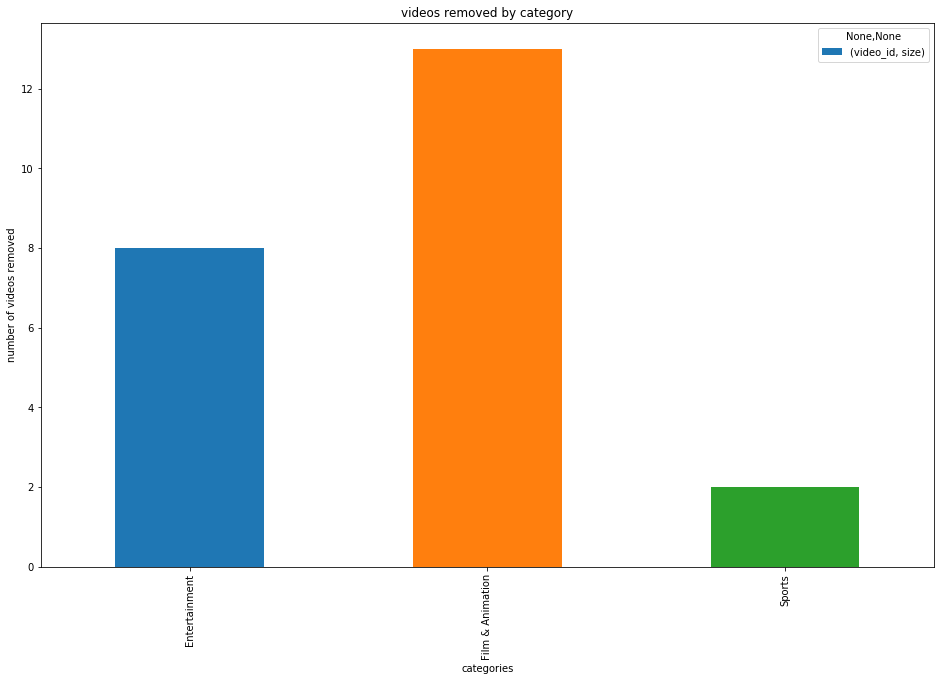

In [13]:
removed = videos.copy(deep=True)
removed = removed[removed['video_error_or_removed'] == True]
removed = removed.loc[:, ['categories', 'video_id']]
removed = removed.groupby('categories').agg([np.size]).reset_index()
graph = removed.plot(x='categories', y=('video_id', 'size'), kind='bar', figsize=(16,10))
graph.set_title('videos removed by category')
graph.set_xlabel("categories")
graph.set_ylabel("number of videos removed")
graph.get_figure().savefig("../doc/report/pics/Analisis_la_cantidad_de_videos_borrados_por_categoria.png")
graph

#### Analisis de la cantidad de vistas de videos segun tenga o no descripcion

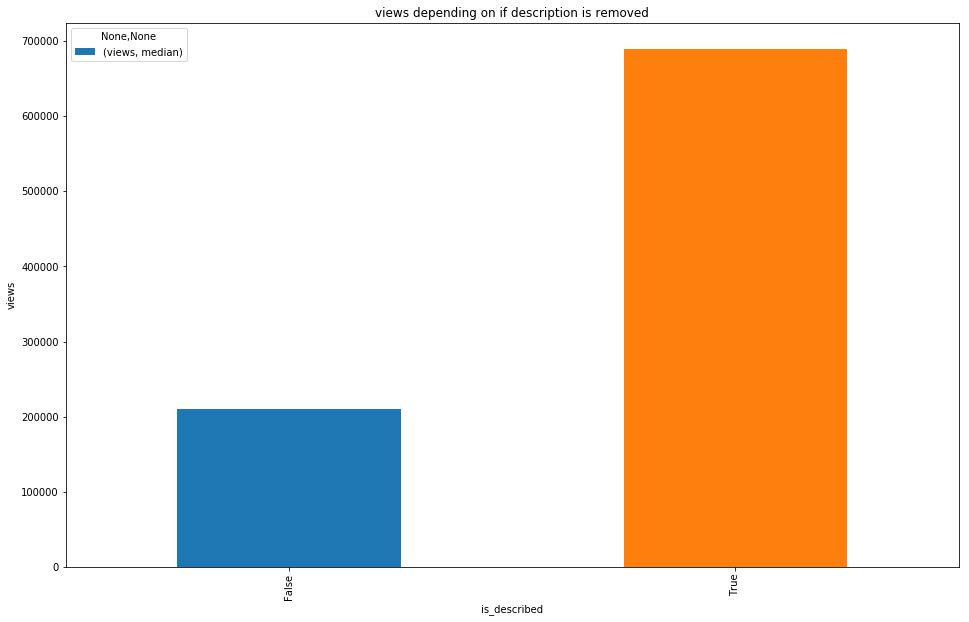

In [14]:
described_videos = videos.copy(deep=True)
described_videos['is_described'] = described_videos['description'].map(lambda x: True if type(x) == type("") else False)
described_videos = described_videos.loc[:, ['is_described', 'views']]
described_videos = described_videos.groupby('is_described').agg([np.size, np.median]).reset_index()
graph = described_videos.plot(x='is_described', y=('views', 'median'), kind='bar', figsize=(16,10))
graph.set_title('views depending on if description is removed')
graph.set_xlabel('is_described')
graph.set_ylabel('views')
graph.get_figure().savefig("../doc/report/pics/Analisis_de_la_cantidad_de_vistas_de_videos_segun_tenga_o_no_descripcion.png")
graph

### Verificar la Calidad de los Datos

### Reporte de Calidad de Datos

Los datos utilizados durante el transcurso del proyecto fueron obtenidos gratuitamente en el sitio de 
Kaggle y el mismo se encuentra en formato csv.

Con millones de aplicaciones en la actualidad, el conjunto de datos se ha convertido en la clave
para obtener las mejores los mejores videos que se publicaron en youtube.  
Este conjunto de datos contiene más de 40000 detalles de videos publicados en youtube.
Fecha de recolección de datos (de API): ```Abril 2019```

# Preparacion de los datos

In [15]:
columns_to_drop = [
    'video_id',
    'trending_date',
    'title',
    'channel_title',
    'tags',
    'likes',
    'dislikes',
    'thumbnail_link',
    'description',
    'categories'
]
def add_class_atributte(videos):
    size = len(videos)
    is_sucessfull_list = [True]*size
    for i in range(0, size):
        if videos['likes_ratio'][i] >= 0.8 and videos['views'][i] > 2000000:
            is_sucessfull_list[i] = True
        else:
            is_sucessfull_list[i] = False
    videos['is_sucessfull'] = is_sucessfull_list
    return videos

In [16]:
videos = get_data_frame("./data/USvideos.csv", ',')
json = get_json("./data/US_category_id.json")
categories_dict = get_categories_convertion(json)
videos = add_categories(videos, categories_dict)
videos = change_date_formats(videos)
videos['days_since_publication'] = videos['trending_date'] - videos['publish_time']
videos['days_since_publication'] = videos['days_since_publication'].map(lambda x: x.days)
videos['title_size'] = videos['title'].map(lambda x: len(x))
videos['tags_quantity'] = videos['tags'].map(lambda x: len(x.split('|')))
videos['likes_ratio'] = videos['likes']/ (videos['likes']+videos['dislikes'])
videos['has_description'] = videos['description'].map(lambda x: True if type(x) == type("") else False)
videos = videos.drop(columns_to_drop, axis=1)
videos.to_csv("./data/videos.csv", index = False, sep = ',', encoding = 'utf-8-sig')
videos.head(4)

,category_id,publish_time,views,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,days_since_publication,title_size,tags_quantity,likes_ratio,has_description
0,22,2017-11-13,748374,15954,False,False,False,1,34,1,0.950970,True
1,24,2017-11-13,2418783,12703,False,False,False,1,62,4,0.940521,True
2,23,2017-11-12,3191434,8181,False,False,False,2,53,23,0.964729,True
3,24,2017-11-13,343168,2146,False,False,False,1,32,27,0.938550,True


## Selección de los datos
Los datos que se terminaron utilizando fueron todos los de tipo numérico y discreto,
principalmente porque el algoritmo utilizado trabaja con este tipo de datos.

## Limpiar los datos
Se limpiaron los siguientes campos:
* video_id
* trending_date
* title
* channel_title
* tags
* likes
* dislikes
* thumbnail_link
* description

## Estructurar los datos
### Derivación de atributos
* days_since_publication: Cantidad de dias desde que se publico el video
* title_size: Longitud en cantidad de caracteres del atributo title
* publish_time: Se modifico el timestamp por un formato tal: YYYY-MM-DD
* tags_quantity: cantidad de tags
* likes_ratio: Ratio de likes y dislikes calculado como: ```likes/(likes+dislikes)```
* has_description: Es verdadero si el video tiene descripcion.

## Generación de registros
Se genero el registro ```is_sucessfull``` que fue calculado en funcion de si el video tiene mas de 2 millones de viws y un ratio mayor o igual a 0.8

## Integración de los datos
Se unieron las datos del dataset con el json de categorias para conocer la relacion entre el valor nuemrico y el nombre de la categoria.

## Formato de los datos
* publish_time: Se modifico el timestamp por un formato tal: YYYY-MM-DD